In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
cars = pd.read_csv(r'C:\Users\aksha\Downloads\Cars (2).csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


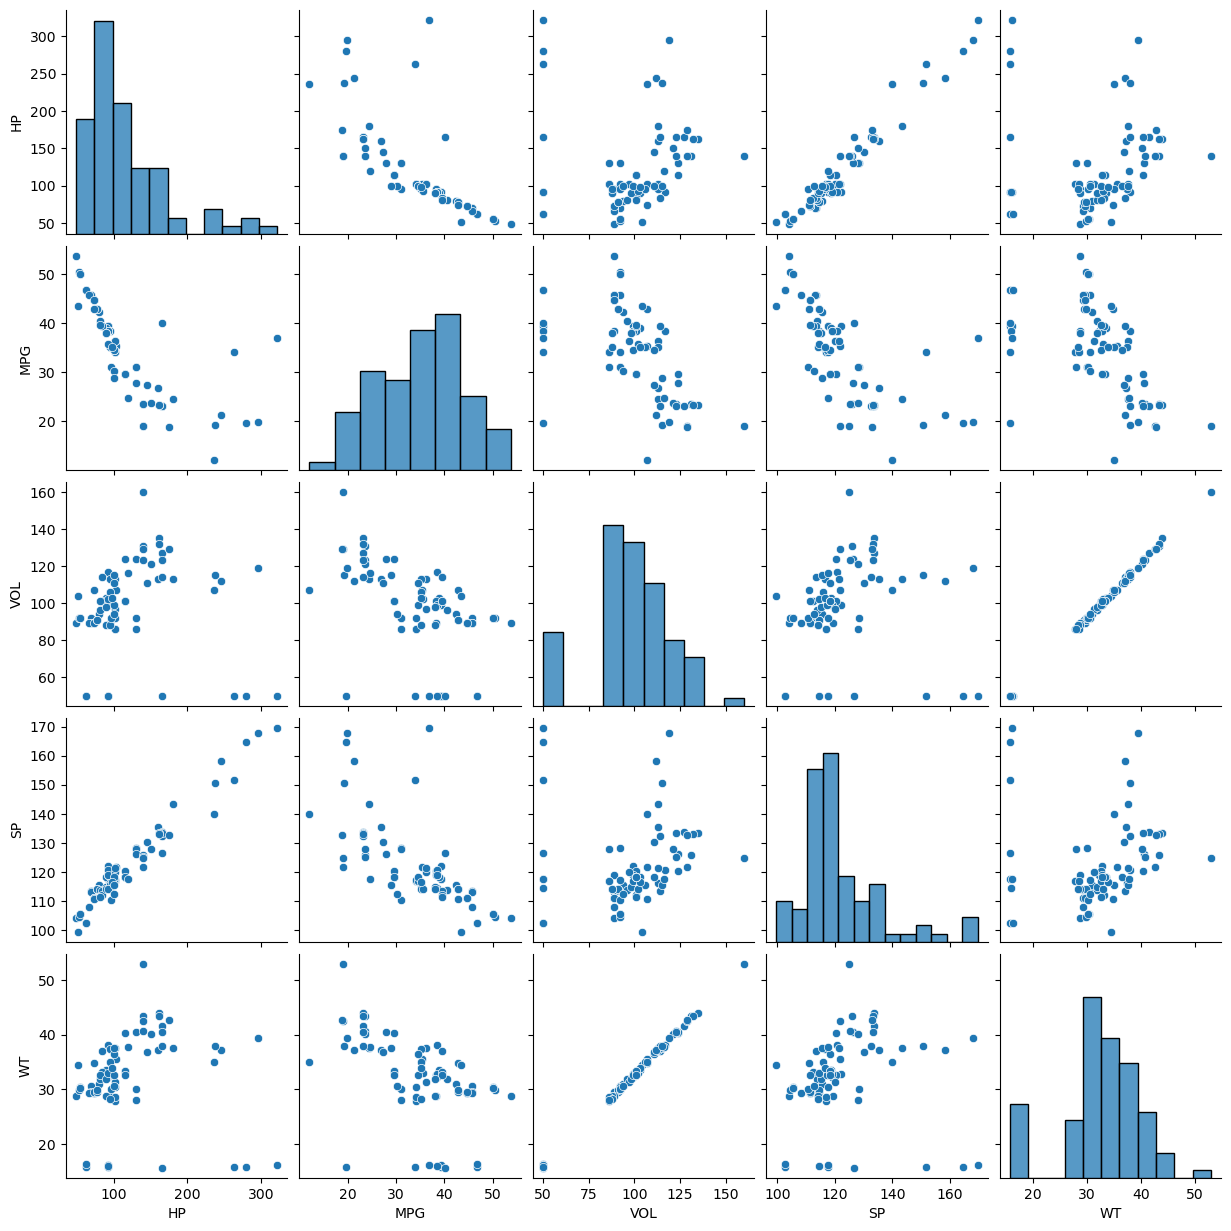

In [3]:
sns.pairplot(cars)

<Axes: >

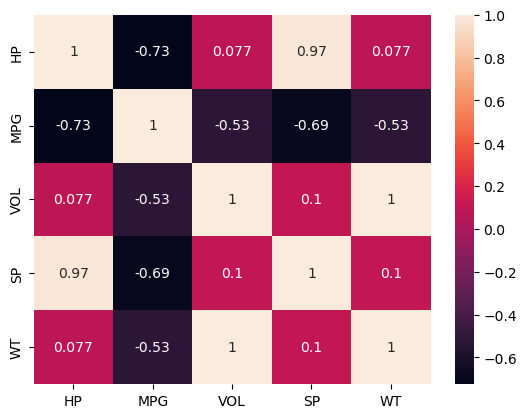

In [4]:
sns.heatmap(cars.corr(),annot=True)

In [5]:
model1=smf.ols('MPG~HP+VOL+SP+WT',data=cars).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.54e-23
Time:                        06:21:15   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p value for volume is 0.556 which is greater than 0.05 ,the null hypothesis is the feature is not good , so here p >alpha so we fail to reject the null hypo ,thus the volume is not a good feature 
### here Wt is also not a good feature ,the p value is 0.814 

### Here we can remove the 2 features,but we will lose the datas ,so we need to finf another way

### so check each features significance

In [6]:
model2=smf.ols('MPG~WT',data=cars).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Wed, 15 May 2024   Prob (F-statistic):           4.38e-07
Time:                        06:21:15   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model3=smf.ols('MPG~VOL',data=cars).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Wed, 15 May 2024   Prob (F-statistic):           3.82e-07
Time:                        06:21:15   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model4=smf.ols('MPG~VOL+WT',data=cars).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Wed, 15 May 2024   Prob (F-statistic):           2.43e-06
Time:                        06:21:15   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Here both VOL and WT have high p value,but VOL and WT is a Good feature when they are taken individually

In [9]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


Here we can obser that there is high correlation between WT and VOL,This is multicolinarity issue, so we need to drop one feature


### Here SP and HP is also Having high correlation

In [10]:
model_sp_hp=smf.ols('MPG~HP+SP',data=cars).fit()
model_sp_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     44.45
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.31e-13
Time:                        06:21:15   Log-Likelihood:                -262.77
No. Observations:                  81   AIC:                             531.5
Df Residuals:                      78   BIC:                             538.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0209     20.495      1.270      0.208     -14.782      66.824
HP            -0.1731      0.054     -3.178      0.002      -0.282      -0.065
SP             0.2364      0.219      1.078      0.285      -0.200       0.673
==============================================================================
Omnibus:                       27.260   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.523
Skew:                           1.214   Prob(JB):                     1.45e-12
Kurtosis:                       6.204   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Here we can see that the p value for SP is high 

In [11]:
model_sp=smf.ols('MPG~SP',data=cars).fit()
model_sp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     70.66
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.41e-12
Time:                        06:21:15   Log-Likelihood:                -267.70
No. Observations:                  81   AIC:                             539.4
Df Residuals:                      79   BIC:                             544.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.1964      6.440     13.695      0.000      75.378     101.015
SP            -0.4424      0.053     -8.406      0.000      -0.547      -0.338
==============================================================================
Omnibus:                        4.004   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                4.021
Skew:                           0.214   Prob(JB):                        0.134
Kurtosis:                       4.004   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_hp=smf.ols('MPG~HP',data=cars).fit()
model_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     87.55
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.96e-14
Time:                        06:21:15   Log-Likelihood:                -263.37
No. Observations:                  81   AIC:                             530.7
Df Residuals:                      79   BIC:                             535.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.0392      1.616     29.722      0.000      44.822      51.256
HP            -0.1159      0.012     -9.357      0.000      -0.141      -0.091
==============================================================================
Omnibus:                       20.653   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.053
Skew:                           0.949   Prob(JB):                     9.00e-09
Kurtosis:                       5.716   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model1=smf.ols('MPG~HP+VOL+SP+WT',data=cars).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.54e-23
Time:                        06:21:15   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### But when we include SP and HP in this model the p values are not high so we can include them

### WT vs HP

In [14]:
model5=smf.ols('MPG~VOL+HP+SP',data=cars).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.56e-24
Time:                        06:21:15   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model5=smf.ols('MPG~HP+SP+WT',data=cars).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.81e-24
Time:                        06:21:15   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
SP             0.4078      0.156      2.609      0.011       0.097       0.719
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Here we can  see that VOL is giving a better Rsquare , we need to check VIF 

## VIF

Feature with high vif is dropped
vif=1/1-(R-square)

In [16]:
model6=smf.ols('VOL~HP+SP+WT',data=cars).fit()
vif_vol=(1/(1-model6.rsquared))

In [17]:
model7=smf.ols('WT~HP+SP+VOL',data=cars).fit()
vif_WT=(1/(1-model7.rsquared))

In [18]:
model8=smf.ols('SP~HP+WT+VOL',data=cars).fit()
vif_SP=(1/(1-model8.rsquared))

In [19]:
model9=smf.ols('HP~WT+SP+VOL',data=cars).fit()
vif_HP=(1/(1-model9.rsquared))

In [20]:
vif=pd.DataFrame(index=['HP','SP','WT','VOL'])

In [21]:
vif['VIF_VALUE']=vif_HP,vif_SP,vif_WT,vif_vol

In [22]:
vif

,VIF_VALUE
HP,19.926589
SP,20.007639
WT,639.533818
VOL,638.806084


Here we can find that WT is having the high VIF value

Also VOL have better R squared value 

We can drop WT

If the VIF of WT are same we need to do trail and error method

### we can evaluate model using AIC criterion and BIC ,AIC and BIC should be low for a good model

In [23]:
final_model=smf.ols('MPG~HP+SP+VOL',data=cars).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.56e-24
Time:                        06:21:15   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation

### 1.Residual plot

plotted between standardized predicted values(fitted values) and standardized Residuals

In [24]:
def stand_values(vals):
    return(vals-vals.mean()/vals.std())

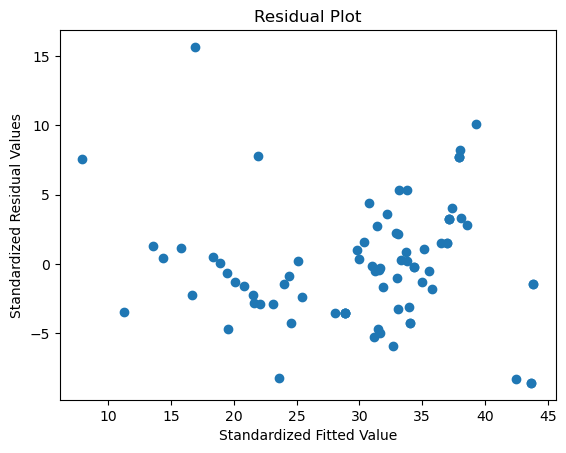

In [25]:
plt.scatter(stand_values(final_model.fittedvalues),stand_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Value')
plt.ylabel('Standardized Residual Values')
plt.show()

### 2.QQ-Plot

here we are taking theoretical residual which are normally distributed vs model residuals. to observe weather the residuals are normally distributed or not

In [26]:
import statsmodels.api as sm

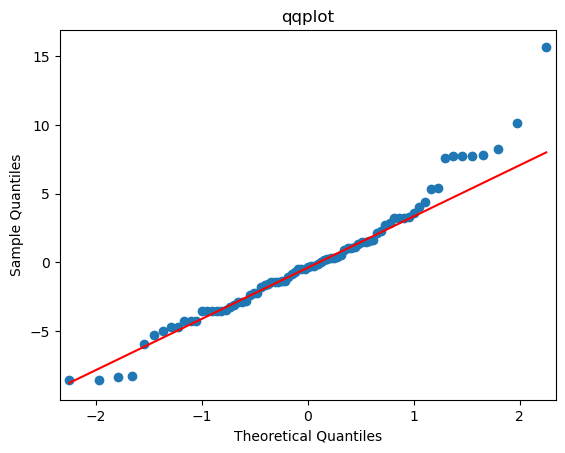

In [27]:
#to check wheather the errors are following normal distribution or not
qqplot=sm.qqplot(final_model.resid,line='q')
plt.title('qqplot')
plt.show()

### The points which do not follow the theoretical resid then those points are influence points or outliers

### 3 Skew and kurtosis

another methode to understand that the resid are normally distributed or not,ideally skew=0,kurtosis=0(3+)

In [28]:
final_model.resid.skew()

0.7174892945062209

In [29]:
final_model.resid.kurtosis()

1.3902701414016096

### 4. Residual vs Regressor

Regressor = independent variable(features)

#### VOL VS RESID

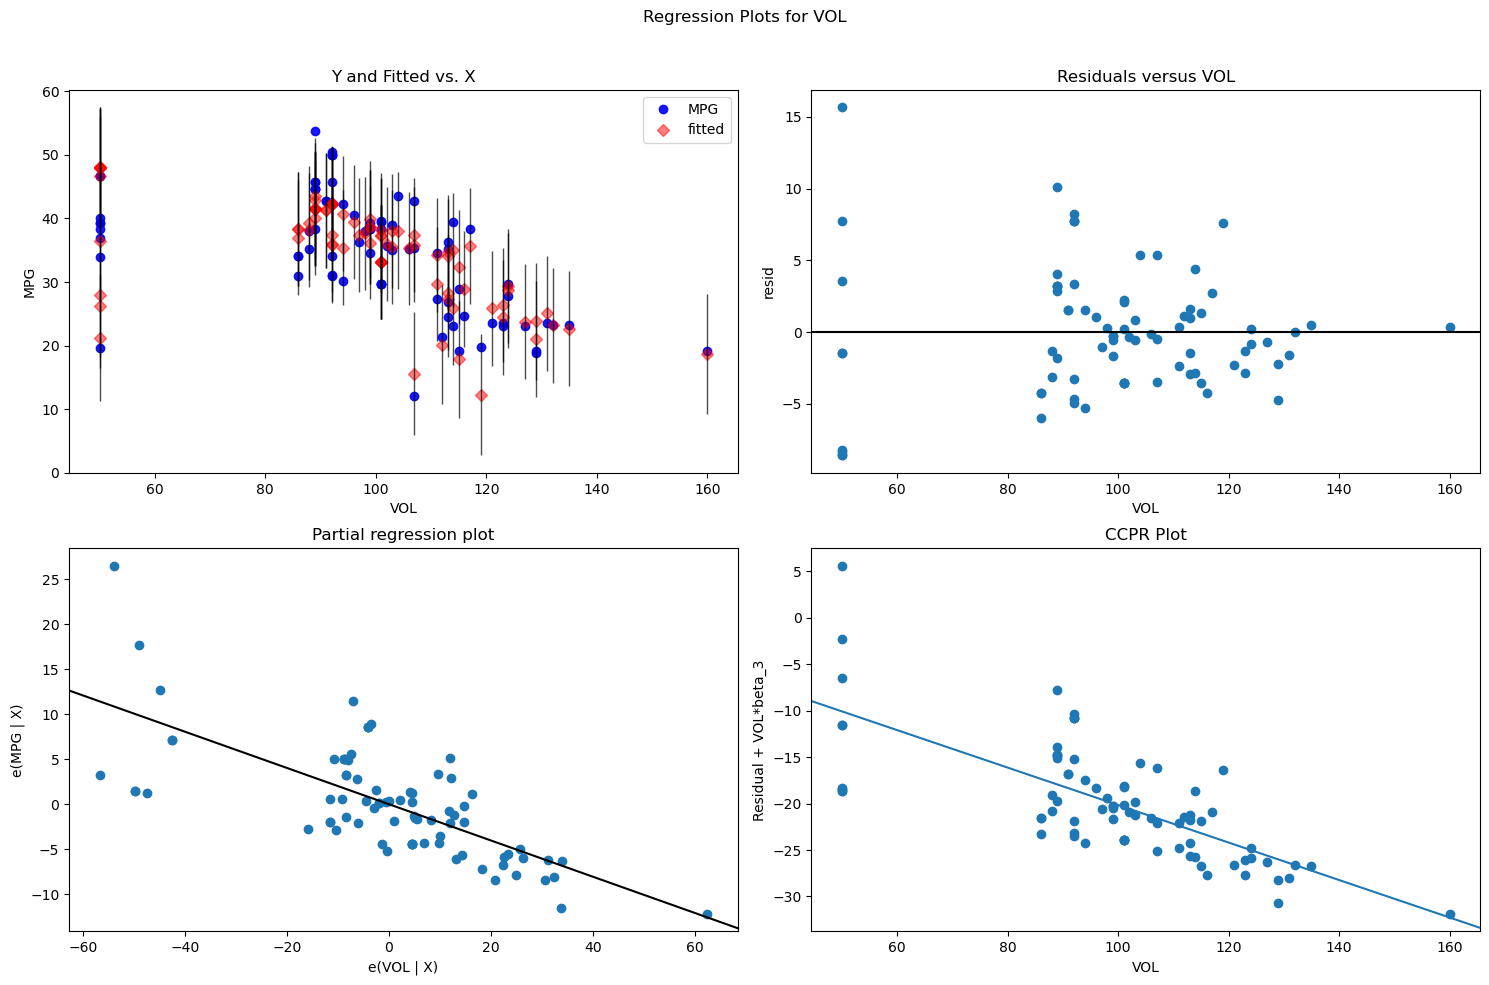

In [30]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(final_model,'VOL',fig=fig)
plt.show()

Resid vs VOl -----> here we can understand that there is no pattern in the data no hetroscadadicity

partial regression plot(added variability plot)---->here we will consider only one feature rest of them are kept constant ,and how the change in one feature effect the target,this show the explainability of varience in target by features

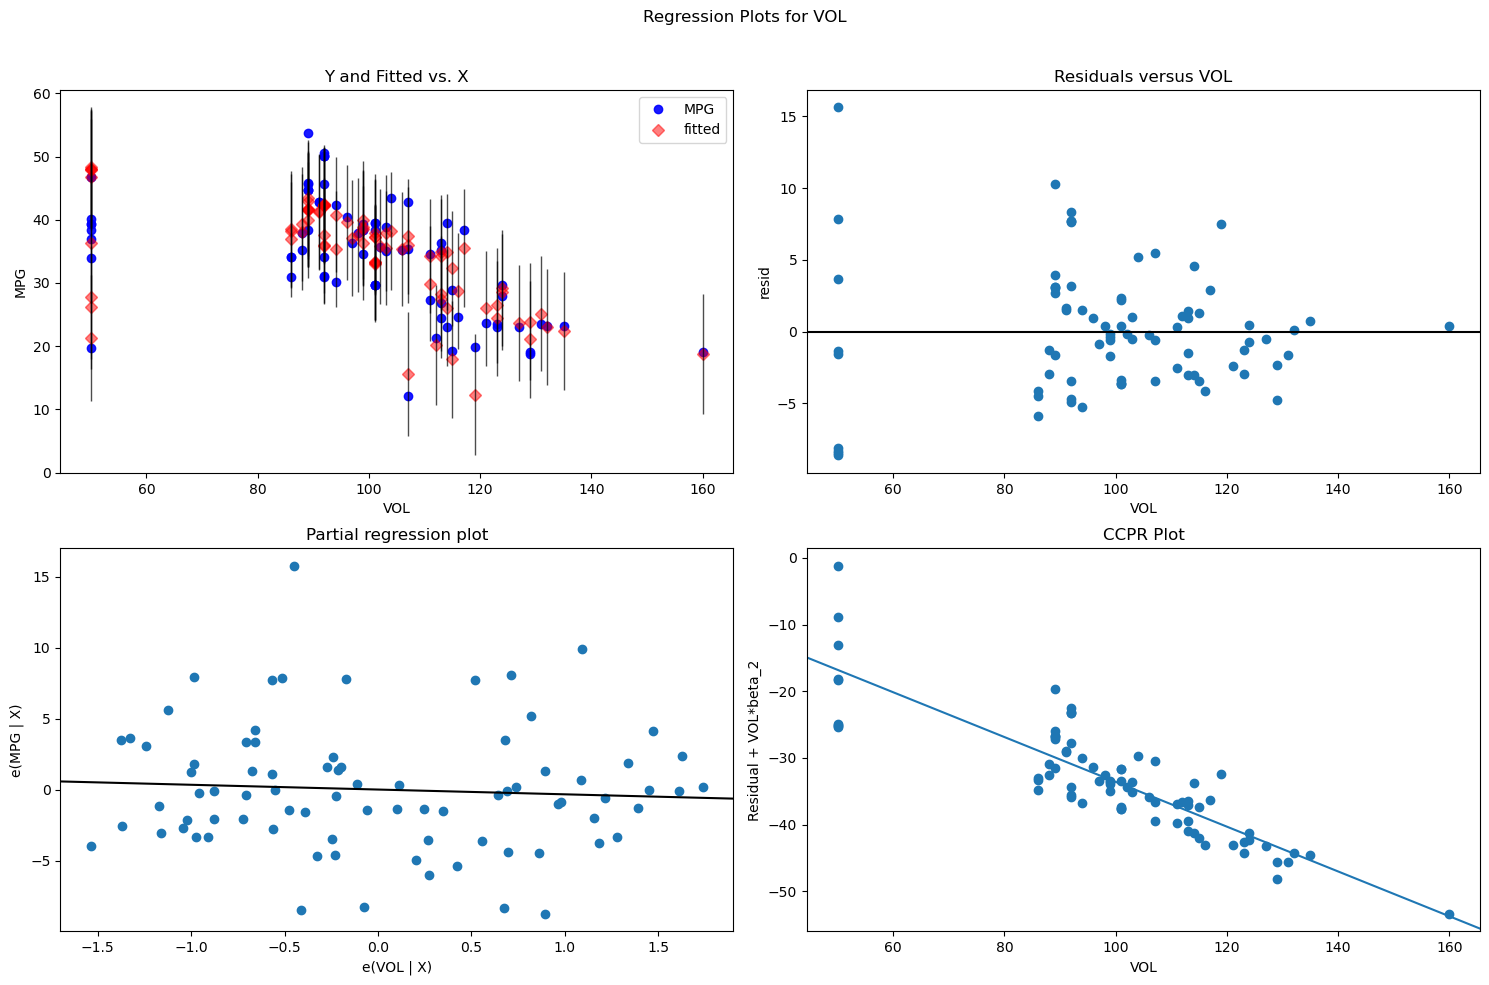

In [31]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model1,'VOL',fig=fig)
plt.show()

here in model1 the volume is having multicolinarity issue with weight so the volume will be not able to explain the varience in the target

CCPR(component vs component+ residual)-------->coeffient of vol=-0.2017 that is the negative slop in CCPR

In [32]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.56e-24
Time:                        06:21:19   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Deletion Diagnostics

In [33]:
from statsmodels.graphics.regressionplots import influence_plot

### Cooks Distance and Stem plot

<StemContainer object of 3 artists>

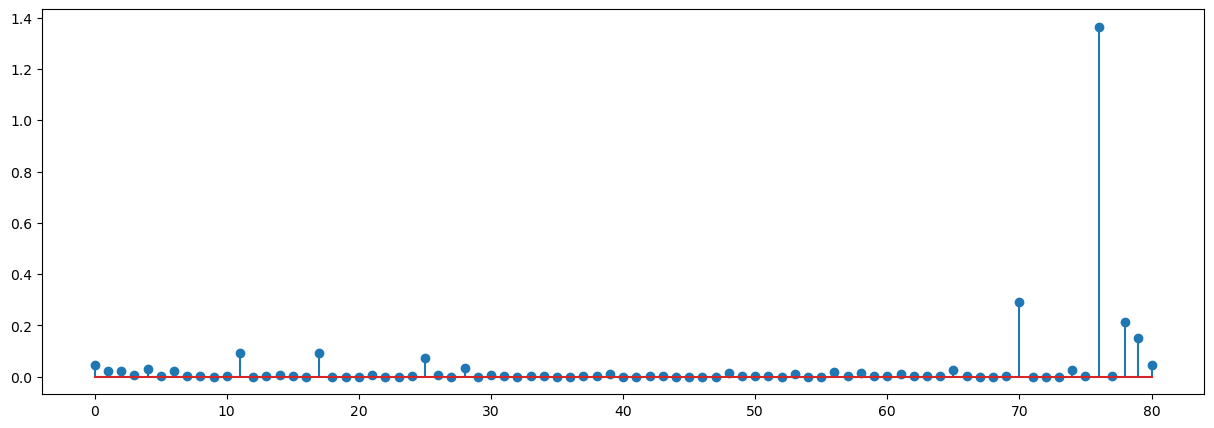

In [36]:
model_inf=final_model.get_influence()
c,_=model_inf.cooks_distance
plt.figure(figsize=(15,5))
plt.stem(cars.index,c)

points having cooks distance greater than 1 is and influencing observation or outlier

In [38]:
print('the max value is ',np.max(c),'the index is ',np.argmax(c))

the max value is  1.364174386910337 the index is  76


### Influence plot and Leverage

leverage cutoff=3*(k+1)/n
k=no of feature
n=number of records

3*(4+1)/81------------>cutoff value

<Figure size 1500x500 with 0 Axes>

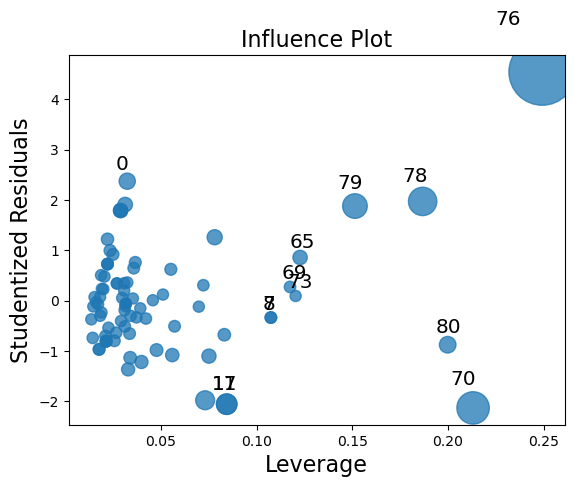

In [52]:
plt.figure(figsize=(15,5))
influence_plot(final_model)
plt.show()

In [45]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [61]:
lev=(3*(3+1))/81
lev

0.14814814814814814

points above 0.148 is outliers

In [68]:
cdf=pd.DataFrame(c,columns=['Value'])

In [72]:
valid=cdf[cdf['Value']<lev]

In [78]:
lst=valid.index.to_list()

In [81]:
new_cars=cars[cars.index.isin(lst)]
new_cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113


In [84]:
final_model2=smf.ols('MPG~HP+VOL+SP',data=new_cars).fit()

In [85]:
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 15 May 2024   Prob (F-statistic):           6.81e-32
Time:                        06:55:26   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
SP             0.4335      0.122      3.560      0.001       0.191       0.676
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

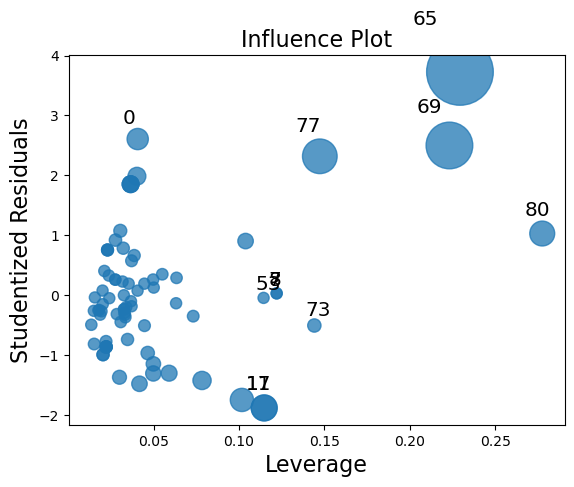

In [87]:
influence_plot(final_model2)
plt.show()

<StemContainer object of 3 artists>

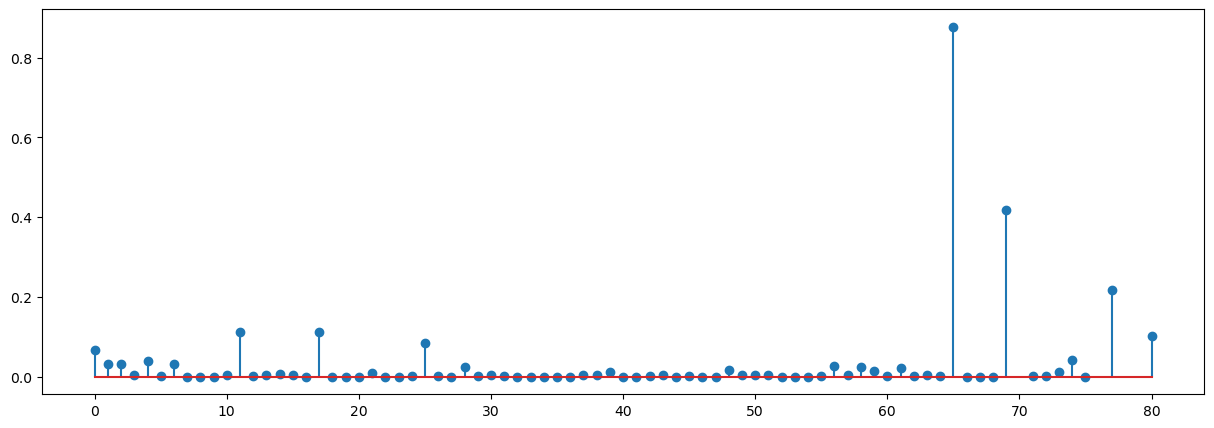

In [89]:
model_inf2=final_model2.get_influence()
c1,_=model_inf2.cooks_distance
plt.figure(figsize=(15,5))
plt.stem(new_cars.index,c1)

In [96]:
lev2=(3*(4))/new_cars.shape[0]

In [97]:
lev2

0.15584415584415584

In [99]:
final_model2.rsquared_adj

0.8614963623305324

In [100]:
final_model.rsquared_adj

0.7614216533208333

In [101]:
cdf2=pd.DataFrame(c1,columns=['Value'])

In [102]:
valid1=cdf2[cdf2['Value']<lev2]

In [103]:
lst1=valid1.index.to_list()

In [104]:
new_cars2=cars[cars.index.isin(lst1)]
new_cars2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
71,162,23.203569,135,133.415985,44.013139
72,162,23.203569,132,133.140074,43.353123
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698


In [105]:
final_model3=smf.ols('MPG~HP+VOL+SP',data=new_cars2).fit()
final_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     68.50
Date:                Wed, 15 May 2024   Prob (F-statistic):           8.75e-21
Time:                        08:30:10   Log-Likelihood:                -211.65
No. Observations:                  74   AIC:                             431.3
Df Residuals:                      70   BIC:                             440.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.0651     16.734      1.677      0.098      -5.310      61.440
HP            -0.2298      0.046     -4.976      0.000      -0.322      -0.138
VOL           -0.1837      0.024     -7.660      0.000      -0.232      -0.136
SP             0.4203      0.179      2.346      0.022       0.063       0.778
==============================================================================
Omnibus:                       42.205   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.283
Skew:                           1.684   Prob(JB):                     1.57e-35
Kurtosis:                       9.375   Cond. No.                     6.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Here the R2 decreased because in final model 2 all the points have cook distanvce below 1 so no need too remove points,so our final model is final_model2